<h1>Code for accessing extracted metadata of papers in PyGGi Pictionary

<h3>Importing libraries

In [1]:
import datetime
import json
import os
from os import listdir
from os.path import isfile, join
import pickle

from bs4 import BeautifulSoup
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

from new_plot import *
set_font()

In [2]:
def unique_fun(list_name):
    
    (unique_list, unique_count) = np.unique(list_name, return_counts = True)

    sorting_index = np.argsort(np.array(unique_count))
    sorted_names = np.array(unique_list)[sorting_index][::-1]
    sorted_count = np.array(unique_count)[sorting_index][::-1]
    return (sorted_names,sorted_count)

<h3> Country data

In [3]:
import os
import pickle
import numpy as np

In [4]:
data_dir = os.path.join(os.getcwd().split('code')[0],'data')

In [5]:
with open(os.path.join(data_dir,'country_list.txt'), 'rb') as des: #this raw list has shortened versions of countries
    country_list_raw =pickle.load(des)
    
country_list_2 =[]
for i in range(len(country_list_raw)):
      for j in range(len(country_list_raw[i])):
        country_list_2.append(country_list_raw[i][j])

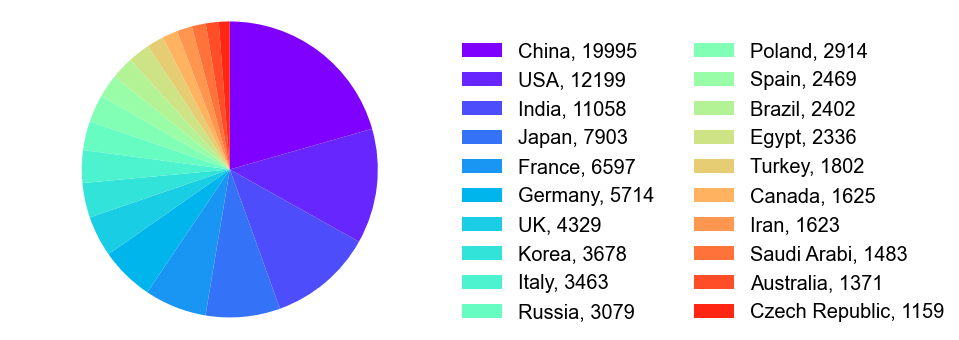

In [6]:
#Ploting countries vs number of publications
(unique_country, counts) = np.unique(np.array(country_list_2), return_counts=True)
for i in range(len(unique_country)):
    if len(unique_country[i])<4:
        unique_country[i] = unique_country[i].upper()
    else:
        unique_country[i] = unique_country[i].title()
unique_country_plot =[]
count_plot =[]
for i in range(len(unique_country)):
    if unique_country[i] == 'None':
        pass
    else:
        unique_country_plot.append(unique_country[i])
        count_plot.append(counts[i])
        
        
#sorting the country list from increasing to decreasing order of number of publications

sorting_index = np.argsort(np.array(count_plot))
sorted_country_names = np.array(unique_country_plot)[sorting_index][::-1][0:20][::-1]
sorted_count = np.array(count_plot)[sorting_index][::-1][0:20][::-1]
fl=sorted_count.astype('float32')
sizes = fl[::-1]
labels = sorted_country_names[::-1]
 
fig1, ax1 = plt.subplots(figsize=(8, 6))
# fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('rainbow')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])
 
_, _ = ax1.pie(sizes, startangle=90, radius=1800,counterclock=False)
 
ax1.axis('equal')
 
total = sum(sizes)
plt.legend(ncol=2,loc=[1,0.01],
    labels=['%s, %d' % (
        l, s)
            for l, s in zip(labels, sizes)],
    # prop={'size': 11},
    bbox_transform=fig1.transFigure
)
# plt.savefig('country_count_pie.png',dpi=1200,bbox_inches='tight')
plt.show()

<h3> Plotting dates

In [7]:
with open(os.path.join(data_dir,'accepted_year.txt'), 'rb') as des: 
    accepted_year =pickle.load(des)

In [8]:
a,b=np.unique(np.array(accepted_year).astype(int),return_counts=True)

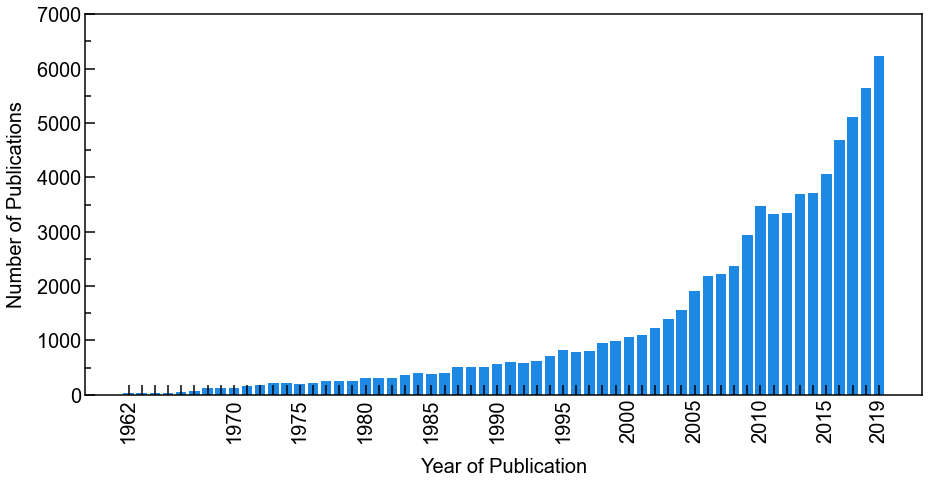

In [9]:
#Property studied vs Number of publications
(properties,counts) = np.unique(accepted_year, return_counts = True)
setlist=[1962,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2019]
showlist=[]
for y in properties[22:-1]:
    if int(y) in setlist:
        showlist.append(y)
    else:showlist.append('')
fig = plt.figure()
# set height ratios for sublots
gs = gridspec.GridSpec(1, 1) 

ax0 = plt.subplot(gs[0])

line0 = ax0.bar(properties[22:-1],counts[22:-1],fc='#1E88E5')

ylabel('No. of Publications')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 

plt.xticks(rotation='vertical')

plt.ylim([0,7000])
# remove vertical gap between subplots
plt.subplots_adjust(hspace=0.)
fig = plt.gcf()
fig.set_size_inches(15,7)
ylabel('Number of Publications',labelpad=10)
xlabel('Year of Publication',labelpad=15)
plt.tick_params(axis = "both", which = "minor",  top = False, right = False, left = True)
plt.tick_params(axis = "both", which = "major",  top = False,  right = False)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False)        # ticks along the top edge are off
ax0.set_xticklabels(showlist)
# plt.savefig('year_vs_numpubs.png',dpi=1200,bbox_inches='tight')
plt.show()


In [10]:
with open(os.path.join(data_dir,'dates_countries_dataframe.txt'), 'rb') as des: 
    dataframe_plot =pickle.load(des)

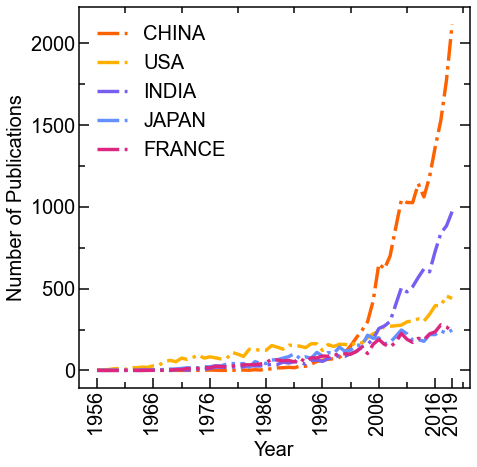

In [11]:
# ploting number of publications vs year for various countries  
clist= ['#FE6100','#FFB000','#785EF0','#648FFF','#DC267F' ]

fig = plt.figure()
# set height ratios for sublots
gs = gridspec.GridSpec(1, 1) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])
for i in range(0,5):
    line0 = ax0.plot(list(range(1956,2020)),dataframe_plot[dataframe_plot.columns[i]][:-1], label = dataframe_plot.columns[i].upper(),lw=3.4,ls='-.',c=clist[i])    
ax0.legend(loc='upper left',handlelength=1.5)
ylabel('No. of Publications')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 
plt.xticks(rotation='vertical')
# plt.ylim([0,2500])

plt.tick_params(axis = "both", which = "minor",  top = False, right = True, left = True)
plt.tick_params(axis = "both", which = "major",  top = False,  right = True)
ticks_list =list(range(1956,2021,10))
ticks_list.append(2019)
# ticks_list.append(2020)
plt.xticks(ticks_list)
plt.subplots_adjust(hspace=0.)
fig = plt.gcf()
fig.set_size_inches(7,7)
ylabel('Number of Publications')
xlabel('Year')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=True)        # ticks along the top edge are off

# plt.savefig('top5_countries_line.png', bbox_inches='tight',dpi=1200)
plt.show() 

<h3> Plotting organisations

In [12]:
with open(os.path.join(data_dir,'organisation_list.txt'), 'rb') as des: 
    organisation_list =pickle.load(des)

In [13]:
(organisation_list_unique, counts) = np.unique(organisation_list, return_counts=True)
sorting_index = np.argsort(np.array(counts))
sorted_organisation = np.array(organisation_list_unique)[sorting_index][::-1]
sorted_count = np.array(counts)[sorting_index][::-1]
# sorted_count

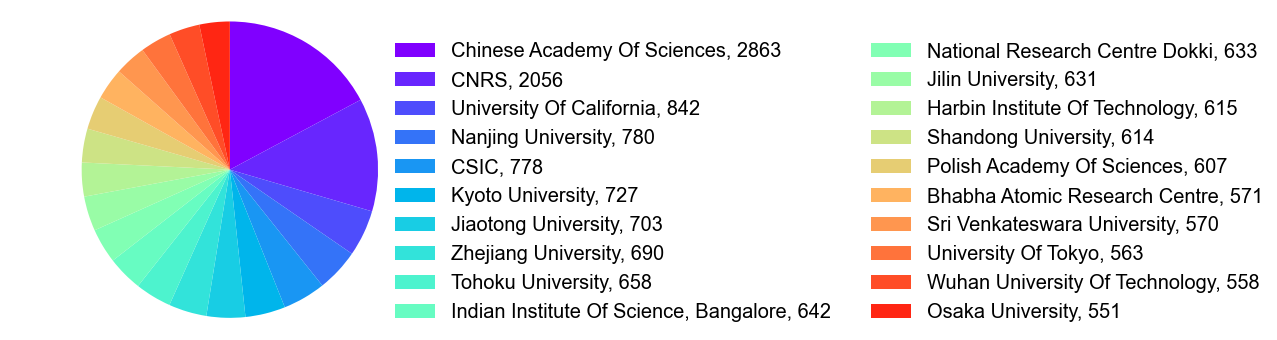

In [14]:
#Organisations vs Number of publications  top 20 only!!!!!

(organisation_list_unique, counts) = np.unique(organisation_list, return_counts=True)

sorting_index = np.argsort(np.array(counts))
sorted_organisation = np.array(organisation_list_unique)[sorting_index][::-1]
sorted_count = np.array(counts)[sorting_index][::-1]

sorted_organisation_plot = sorted_organisation[0:20][::-1]
sorted_organisation_plot_title=[]
for i in sorted_organisation_plot:
    if len(i)>4:
        sorted_organisation_plot_title.append(i.title())
    else:
        sorted_organisation_plot_title.append(i.upper())
        
sorted_count_plot = sorted_count[0:20][::-1]

sizes = sorted_count_plot[::-1]
labels = sorted_organisation_plot_title[::-1]
fig1, ax1 = plt.subplots(figsize=(8, 6))
# fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('rainbow')

ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90, radius=1800,counterclock=False)

ax1.axis('equal')

total = sum(sizes)
plt.legend(ncol=2,loc=[0.85,0.01],
    labels=['%s, %d' % (l, s) for l, s in zip(labels, sizes)],
    bbox_transform=fig1.transFigure
)
# plt.savefig('institutes_top20_pie.png',dpi=1200,bbox_inches='tight')
plt.show()

<h3> Plotting Keywords

In [15]:
with open(os.path.join(data_dir,'journal_list.txt'), 'rb') as des: 
    journal_list =pickle.load(des)

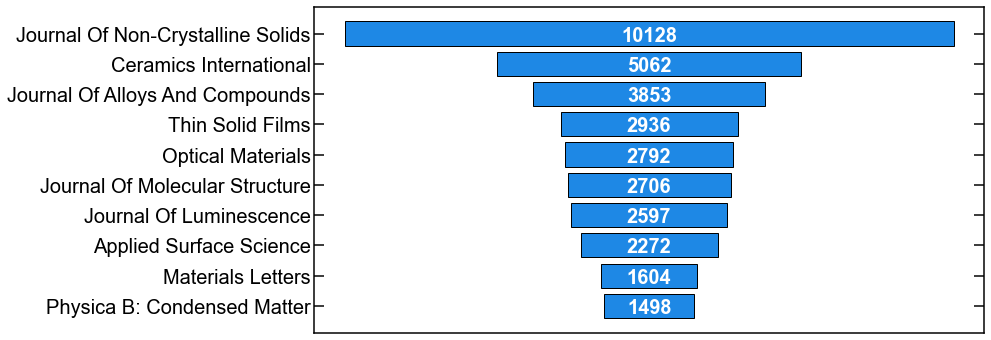

In [16]:
#Plots for paper - Journals vs No of Publications
#Ploting Journal name vs number of publications - top 20 only!!

(unique_journal_name, counts) = np.unique(journal_list, return_counts=True)
for i in range(len(unique_journal_name)):
    unique_journal_name[i] = unique_journal_name[i].title()

#sorting the journal_name_list from increasing to decreasing order of number of publications
sorting_index = np.argsort(np.array(counts))
sorted_journal_names = np.array(unique_journal_name)[sorting_index][::-1]
sorted_count = np.array(counts)[sorting_index][::-1]

sorted_journal_names_plot =sorted_journal_names[0:10][::-1]
sorted_count_plot =sorted_count[0:10][::-1]

dff=pd.DataFrame({'x':sorted_journal_names_plot,
'y':sorted_count_plot})#.to_csv('journal_vs_pubs.csv',index=False)
y = np.arange(1,11)

x = dff.y
labels = dff.x
x_max = max(x)
x_min = min(x)
x_range = x_max - x_min
center = max(x)/2
fig, ax = plt.subplots(1, figsize=(12,6))
for idx, val in enumerate(x):
    left = 1000+center-x[idx]/2
    plt.barh(labels[idx], x[idx],left=left,color='#1E88E5',
             height=.8, edgecolor='black')
    # label
    # plt.text(center, y[idx]+0.1, labels[idx], ha='center', 
    #           fontsize=20, color='w',fontweight='bold')
    # value
    plt.text(center+1000, y[idx]-1.25, x[idx], ha='center',
              fontsize=20, color='w',fontweight='bold')
    
plt.xlim(x_min-1000, x_max+1500)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False, left=False, right=False,     # ticks along the bottom edge are off
    top=False)
plt.tick_params(axis='x',  which='major', bottom=False, left=False, right=False, top=False)
plt.xticks([])
# plt.savefig('journals_num_pubs.png',dpi=1200,bbox_inches='tight')
# plt.axis('off')
plt.show()

<h3> Plotting Properties

In [17]:
with open(os.path.join(data_dir,'property_dict.txt'), 'rb') as des: 
    prop_dict =pickle.load(des)

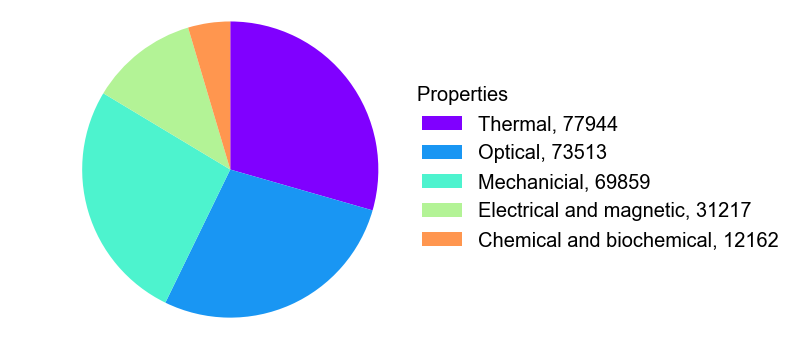

In [18]:
#ploting properties studied vs no of publications

sorting_index = np.argsort(np.array(list(prop_dict.values())))
sorted_properties_names = np.array(list(prop_dict.keys()))[sorting_index][::-1][::-1]
sorted_count = np.array(list(prop_dict.values()))[sorting_index][::-1][::-1]
sorted_properties_names_title =[]
for i in sorted_properties_names:
    sorted_properties_names_title.append(i.title())
    

sizes = sorted_count[::-1]
labels =  ['Thermal', 'Optical', 'Mechanicial', 'Electrical and magnetic', 'Chemical and biochemical']#sorted_properties_names_title[::-1]
fig1, ax1 = plt.subplots(figsize=(8, 6)) 
theme = plt.get_cmap('rainbow')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90, radius=1800,counterclock=False)

ax1.axis('equal')

total = sum(sizes)
# plt.legend(ncol=2,loc=[0.85,0.01],
# 
plt.legend(ncol=1,loc=[0.9,0.23],title='Properties                                                  ',
    labels=['%s, %d' % (l, s) for l, s in zip(labels, sizes)],
    bbox_transform=fig1.transFigure
)
# plt.savefig('properties.png',dpi=1200,bbox_inches='tight')
plt.show()

<h3> Plotting keywords
    

In [19]:
with open(os.path.join(data_dir,'keywords_list.txt'),'rb') as f:
    keywords_list = pickle.load(f)

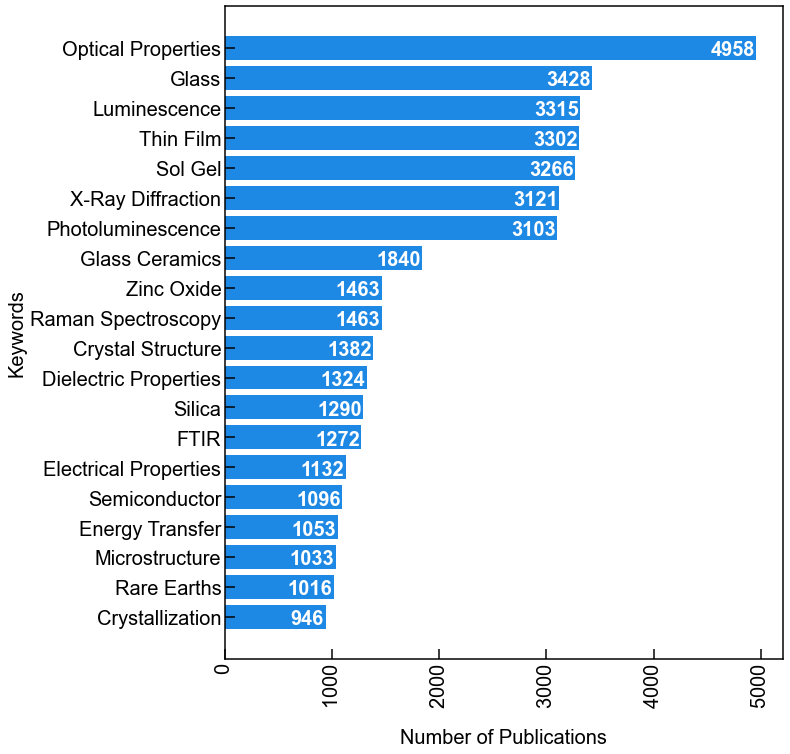

In [20]:
#ploting keywords vs no of publications

(unique_keywords, counts) = np.unique(keywords_list, return_counts=True)
# for i in range(len(unique_keywords)):
#     unique_journal_name[i] = unique_journal_name[i].title()

#sorting the journal_name_list from increasing to decreasing order of number of publications
sorting_index = np.argsort(np.array(counts))
sorted_keywords = np.array(unique_keywords)[sorting_index][::-1]
sorted_count = np.array(counts)[sorting_index][::-1]

sorted_keywords_plot =sorted_keywords[0:20][::-1]
sorted_count_plot =sorted_count[0:20][::-1]

new_sorted_keywords_plot = []
for i in sorted_keywords_plot:
    if len(i)>4:
        new_sorted_keywords_plot.append(i.title())
    else:
        new_sorted_keywords_plot.append(i.upper())

fig = plt.figure()
# set height ratios for sublots
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])

line0 = ax0.barh(new_sorted_keywords_plot,sorted_count_plot,fc='#1E88E5')

ylabel('No. of Publications')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 
for i in range(len(new_sorted_keywords_plot)):
    if str(sorted_count_plot[i])=='946':
        plt.text(sorted_count_plot[i]-180,i,str(sorted_count_plot[i]),ha='center',c='w',fontweight='bold',va='center_baseline')
    else:
        plt.text(sorted_count_plot[i]-220,i,str(sorted_count_plot[i]),ha='center',c='w',fontweight='bold',va='center_baseline')

plt.xticks(rotation='vertical')
# remove vertical gap between subplots
plt.subplots_adjust(hspace=0.)
fig = plt.gcf()
fig.set_size_inches(10,12)
xlabel('Number of Publications',labelpad=20)
ylabel('Keywords')
plt.tick_params(axis = "both", which = "minor",  top = False, right = False, left = False)
plt.tick_params(axis = "both", which = "major",  top = False,  right = False)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False)        # ticks along the top edge are off

# plt.savefig('Keyword_vs_Number_of_publications.png',dpi=1200,bbox_inches='tight')
plt.show()

<h3> Structure factor plots

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from new_plot import *
set_font()
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [22]:
data_84_xray = pd.read_csv(os.path.join(data_dir,'84 Xray.csv'))
data_84_neutron = pd.read_csv(os.path.join(data_dir,'84 Neutron.csv'))

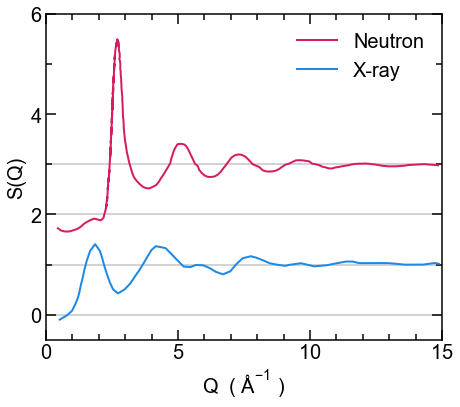

In [23]:
#ploting number of publications vs year for various countries  
from matplotlib import gridspec
# set_mood_light()

fig = plt.figure()
# set height ratios for sublots
gs = gridspec.GridSpec(1, 1) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])

line0 = ax0.plot(data_84_neutron[' Q(Angstrom -1)'],data_84_neutron['S(Q)'],label = 'Neutron',c='#D81B60')
line0 = ax0.plot(data_84_xray[' Q(Angstrom -1)'],data_84_xray['S(Q)'],label = 'X-ray',c='#1E88E5')
ax0.legend()

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 


# plt.tick_params(axis = "both", which = "major",  top = False,  right = False,bottom= True, left = True)
# plt.tick_params(axis = "both", which = "minor",   top = False, right = False, bottom = True, left = True)


plt.subplots_adjust(hspace=0.)
fig = plt.gcf()
fig.set_size_inches(7.1,6)
ylabel('S(Q)')
xlabel ('Q  ( $\AA^{-1}$ )')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=True)        # ticks along the top edge are off
ax0.xaxis.set_minor_locator(MultipleLocator(1))
ax0.xaxis.set_major_locator(MultipleLocator(5))

ax0.yaxis.set_major_locator(MultipleLocator(2))

ax0.yaxis.set_minor_locator(MultipleLocator(1))
ax0.set_yticks([0,2,4,6])
for y in range(0,4):
    plt.hlines(y=y,xmin=-1,xmax=20,colors='lightgrey',zorder=1)
plt.xlim(0,15)
plt.ylim(-0.5,6.001)
# plt.savefig('sf_extracted.png',dpi=1200,bbox_inches='tight',transparent=False)
plt.show()

In [24]:
with open(os.path.join(data_dir,'number_of_components.txt'),'rb') as f:
    number_of_components = pickle.load(f)

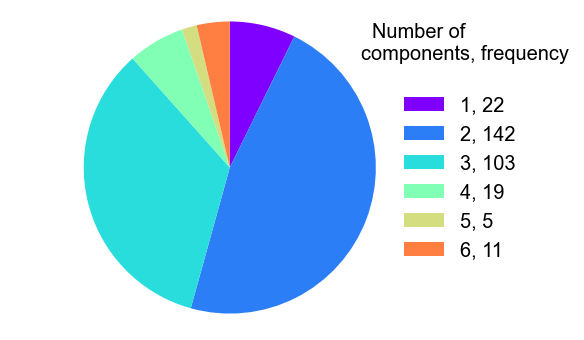

In [25]:
#Number of components vs Number of glasses

(unique_components, counts) = np.unique(number_of_components, return_counts=True)
# sorting_index = np.argsort(np.array(counts))
# sorted_properties = np.array(years)[sorting_index][::-1]
# sorted_count = np.array(counts)[sorting_index][::-1]

import matplotlib.pyplot as plt
theme = plt.get_cmap('rainbow')

dffig =pd.DataFrame({'numcomp':unique_components,'freq':counts})
dffig = dffig.sort_values(by='freq',ascending=False)

# sizes = dffig.freq #counts#[::-1]
# labels =dffig.numcomp# unique_components#sorted_country_names[::-1]
sizes = counts
labels = unique_components
fig1, ax1 = plt.subplots(figsize=(8, 6))
# fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('rainbow')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])
 
_, _ = ax1.pie(sizes, startangle=90, radius=1800,counterclock=False)
 
ax1.axis('equal')
 
total = sum(sizes)
plt.legend(ncol=1,loc=[0.75,0.2],
    labels=['%s, %d' % (l, s) for l, s in zip(labels, sizes)],title='    Number of \n  components, frequency\n',
    bbox_transform=fig1.transFigure
)
# plt.savefig('ncomp_freq_pie.png',dpi=1200,bbox_inches='tight')
plt.show()

In [26]:
with open(os.path.join(data_dir,'glasses_count.txt'),'rb') as f:
    glasses_count = pickle.load(f)

with open(os.path.join(data_dir,'component_names.txt'),'rb') as f:
    component_names = pickle.load(f)

In [27]:
def make_hill(chemicals):
    
    '''
    Function for converting chemical formula to hill notation
    takes input as a list. For example, 
    >> chemicals =['Al2O3']
    >> make_hill(chemicals)
    Output: ['Al$_2$O$_3$']
    '''
    
    hill_all = []
    for col in chemicals:
        hill = ''
        for ele in col:
            if ele in ['2','3','4','5','6','7','8','9','10','11','12','13']:
                hill = hill + '$_' + ele + '$'
            else:
                hill = hill + ele
#         print(hill)
        hill_all.append(hill)
    return hill_all

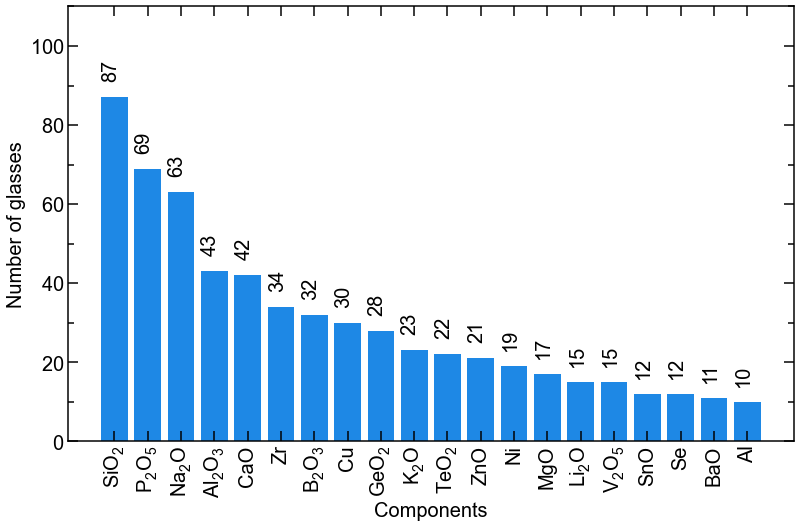

In [28]:
sorting_index = np.argsort(np.array(glasses_count))
sorted_component_names = np.array(component_names)[sorting_index][::-1]
sorted_glasses_count = np.array(glasses_count)[sorting_index][::-1]
chemnames=make_hill(sorted_component_names)
chemnames=chemnames[:20][::-1]
nums=sorted_glasses_count[0:20][::-1]
chemnames=chemnames[::-1]
nums=nums[::-1]
fix,ax=plt.subplots(figsize=[13,8])
ax.bar(chemnames,nums,fc='#1E88E5')
plt.xticks(rotation='vertical')
plt.ylim([0,110])
plt.tick_params(axis='x',which='minor',bottom=False,top=False)        
for i in range(len(nums)):
    plt.text(i-0.4,nums[i]+5,str(nums[i]),rotation='vertical')
plt.xlabel('Components')
plt.ylabel('Number of glasses')
# plt.savefig('comp_vs_numglass.png',dpi=1200,bbox_inches='tight')
plt.show()